In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Aatif\Actual_data_cdac.csv", nrows=5000000)


In [3]:
df.head()

,t_dat,article_id,price,product_code,product_type_no,product_group_name
0,2018-09-20,663713001,0.050831,663713,283,Underwear
1,2018-09-20,663713001,0.049475,663713,283,Underwear
2,2018-09-20,663713001,0.050831,663713,283,Underwear
3,2018-09-20,663713001,0.050831,663713,283,Underwear
4,2018-09-20,663713001,0.050831,663713,283,Underwear


In [4]:
df['t_dat'] = pd.to_datetime(df['t_dat'])

In [5]:
df.columns

Index(['t_dat', 'article_id', 'price', 'product_code', 'product_type_no',
       'product_group_name'],
      dtype='object')

In [6]:
grouped = df.groupby(['t_dat', 'product_type_no']).size().reset_index(name='quantity_sold')

# Merge the grouped data back to the original DataFrame
merged_df = pd.merge(df, grouped, on=['t_dat', 'product_type_no'], how='left')

# Print the updated DataFrame
merged_df

,t_dat,article_id,price,product_code,product_type_no,product_group_name,quantity_sold
0,2018-09-20,663713001,0.050831,663713,283,Underwear,96
1,2018-09-20,663713001,0.049475,663713,283,Underwear,96
2,2018-09-20,663713001,0.050831,663713,283,Underwear,96
3,2018-09-20,663713001,0.050831,663713,283,Underwear,96
4,2018-09-20,663713001,0.050831,663713,283,Underwear,96
...,...,...,...,...,...,...,...
4999995,2018-09-29,514482002,0.025407,514482,306,Underwear,3104
4999996,2018-09-29,514482002,0.025407,514482,306,Underwear,3104
4999997,2018-09-29,514482002,0.025407,514482,306,Underwear,3104
4999998,2018-09-29,514482002,0.020339,514482,306,Underwear,3104


In [7]:
# Specify the product type you want to filter for
product_type_to_filter = 'Underwear'

# Filter the DataFrame for the specified product type
filtered_df = merged_df[merged_df['product_group_name'] == product_type_to_filter]

# Print the filtered DataFrame
filtered_df[['t_dat', 'product_group_name', 'quantity_sold']]

,t_dat,product_group_name,quantity_sold
0,2018-09-20,Underwear,96
1,2018-09-20,Underwear,96
2,2018-09-20,Underwear,96
3,2018-09-20,Underwear,96
4,2018-09-20,Underwear,96
...,...,...,...
4999995,2018-09-29,Underwear,3104
4999996,2018-09-29,Underwear,3104
4999997,2018-09-29,Underwear,3104
4999998,2018-09-29,Underwear,3104


In [8]:
filtered_df_no_duplicates = filtered_df.drop_duplicates(subset=['t_dat'])

# Print the DataFrame without duplicate rows
print(filtered_df_no_duplicates[['t_dat', 'product_group_name', 'quantity_sold']])

            t_dat product_group_name  quantity_sold
0      2018-09-20          Underwear             96
6      2018-09-21          Underwear            101
13     2018-09-22          Underwear             45
15     2018-09-23          Underwear             92
26     2018-09-24          Underwear             91
...           ...                ...            ...
113748 2020-09-21          Underwear             57
113765 2020-09-22          Underwear             34
487219 2020-04-12          Underwear             34
487244 2020-04-13          Underwear             43
551163 2020-05-05          Underwear             18

[734 rows x 3 columns]


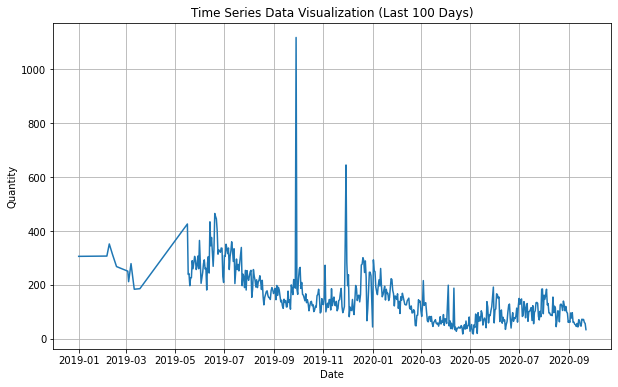

In [11]:
#Visualizing the old data:
import matplotlib.pyplot as plt


import seaborn as sns

recent_df = filtered_df_no_duplicates.tail(500)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=recent_df, x=recent_df.t_dat, y='quantity_sold')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Time Series Data Visualization (Last 100 Days)')
plt.grid(True)
plt.show()











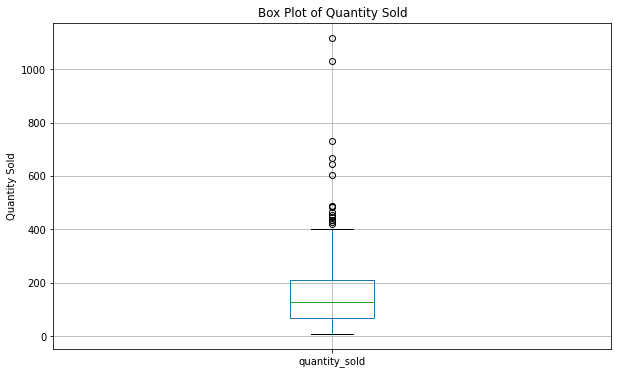

In [12]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
filtered_df_no_duplicates.boxplot(column='quantity_sold')

plt.title("Box Plot of Quantity Sold")
plt.ylabel("Quantity Sold")
plt.show()

In [13]:
from prophet import Prophet

c:\Users\Aatif\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:

# Rename columns for Prophet compatibility
filtered_df_no_duplicates.rename(columns={'t_dat': 'ds', 'quantity_sold': 'y'},inplace=True)


C:\Users\Aatif\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
filtered_df_no_duplicates

,ds,article_id,price,product_code,product_type_no,product_group_name,y
0,2018-09-20,663713001,0.050831,663713,283,Underwear,96
6,2018-09-21,663713001,0.050831,663713,283,Underwear,101
13,2018-09-22,663713001,0.050831,663713,283,Underwear,45
15,2018-09-23,663713001,0.050831,663713,283,Underwear,92
26,2018-09-24,663713001,0.050831,663713,283,Underwear,91
...,...,...,...,...,...,...,...
113748,2020-09-21,611415001,0.016932,611415,286,Underwear,57
113765,2020-09-22,611415001,0.016932,611415,286,Underwear,34
487219,2020-04-12,464297007,0.016932,464297,286,Underwear,34
487244,2020-04-13,464297007,0.016932,464297,286,Underwear,43


19:26:46 - cmdstanpy - INFO - Chain [1] start processing
19:26:46 - cmdstanpy - INFO - Chain [1] done processing


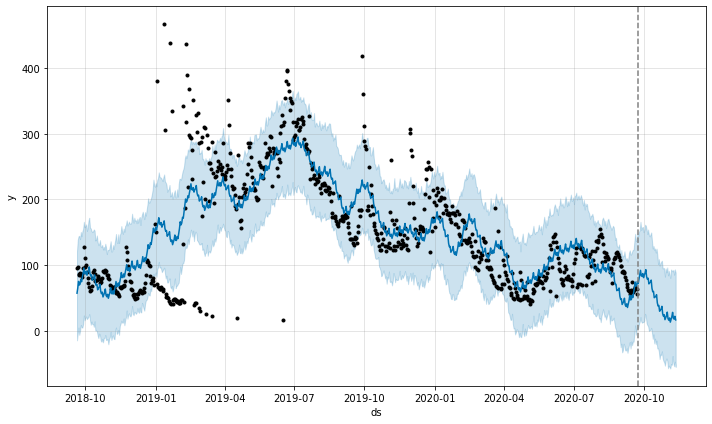

In [16]:
import pandas as pd
from prophet import Prophet

# Load your data into 'df'

# Apply Exponential Moving Average (EMA) smoothing
window_size = 7  # Adjust as needed
smoothed_values = filtered_df_no_duplicates['y'].ewm(span=window_size, adjust=False).mean()

# Create a new DataFrame with the smoothed values
smoothed_df = pd.DataFrame({'ds': filtered_df_no_duplicates['ds'], 'y': smoothed_values})

# Instantiate the Prophet model
model = Prophet()

# Fit the model using the smoothed data
model.fit(smoothed_df)

# Create a future DataFrame for forecasting
future = model.make_future_dataframe(periods=50)  # Forecast next 50 days

# Make forecasts
forecast = model.predict(future)

fig = model.plot(forecast)
ax = fig.gca()  # Get the current axis

plt.axvline(forecast.iloc[-50]['ds'], color='gray', linestyle='--')
plt.show()


In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# Extract predicted values from the forecast DataFrame
predicted_values = forecast['yhat'].values

# Extract actual values from the original DataFrame
actual_values = filtered_df_no_duplicates['y'].values  # Assuming the actual values are in column 'y'

# Match the lengths using the minimum length
min_length = min(len(actual_values), len(predicted_values))
actual_values_matched = actual_values[:min_length]
predicted_values_matched = predicted_values[:min_length]

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values_matched, predicted_values_matched)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mean_squared_error(actual_values_matched, predicted_values_matched))
print("Root Mean Squared Error:", rmse)


mape = np.mean(np.abs((actual_values_matched - predicted_values_matched) / actual_values_matched)) * 100
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 55.68038705590539
Root Mean Squared Error: 88.17064726793423
Mean Absolute Percentage Error: 64.98433785471384


19:26:58 - cmdstanpy - INFO - Chain [1] start processing
19:26:58 - cmdstanpy - INFO - Chain [1] done processing


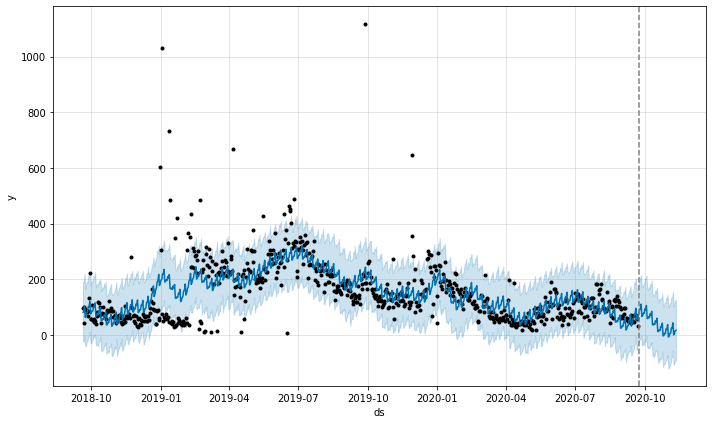

In [18]:
# Instantiate the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(filtered_df_no_duplicates)

# Create a future DataFrame for forecasting
future = model.make_future_dataframe(periods=50)  # Forecast next 50 days

# Make forecasts
forecast = model.predict(future)

# Plot forecasts
fig = model.plot(forecast)
ax = fig.gca()  # Get the current axis

plt.axvline(forecast.iloc[-50]['ds'], color='gray', linestyle='--')
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-20,66.614129,-23.060941,186.558535,66.614129,66.614129,15.487364,15.487364,15.487364,10.913614,10.913614,10.913614,4.573750,4.573750,4.573750,0.0,0.0,0.0,82.101493
1,2018-09-21,67.406889,-25.032561,193.417939,67.406889,67.406889,16.436231,16.436231,16.436231,8.783051,8.783051,8.783051,7.653181,7.653181,7.653181,0.0,0.0,0.0,83.843120
2,2018-09-22,68.199649,2.251665,210.209318,68.199649,68.199649,37.021489,37.021489,37.021489,26.544335,26.544335,26.544335,10.477154,10.477154,10.477154,0.0,0.0,0.0,105.221138
3,2018-09-23,68.992408,-37.165270,172.179601,68.992408,68.992408,-5.282928,-5.282928,-5.282928,-18.283411,-18.283411,-18.283411,13.000482,13.000482,13.000482,0.0,0.0,0.0,63.709480
4,2018-09-24,69.785168,-41.573511,177.414339,69.785168,69.785168,-0.047085,-0.047085,-0.047085,-15.231051,-15.231051,-15.231051,15.183966,15.183966,15.183966,0.0,0.0,0.0,69.738083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2020-11-07,57.106766,-59.766272,148.659523,54.243736,60.042746,-13.021851,-13.021851,-13.021851,26.544335,26.544335,26.544335,-39.566186,-39.566186,-39.566186,0.0,0.0,0.0,44.084915
780,2020-11-08,56.903703,-105.033268,109.778984,53.952836,59.938231,-56.119318,-56.119318,-56.119318,-18.283411,-18.283411,-18.283411,-37.835907,-37.835907,-37.835907,0.0,0.0,0.0,0.784385
781,2020-11-09,56.700641,-101.087138,115.477863,53.566235,59.847911,-51.248048,-51.248048,-51.248048,-15.231051,-15.231051,-15.231051,-36.016997,-36.016997,-36.016997,0.0,0.0,0.0,5.452593
782,2020-11-10,56.497578,-99.994510,125.084583,53.250214,59.740066,-40.467331,-40.467331,-40.467331,-6.328854,-6.328854,-6.328854,-34.138477,-34.138477,-34.138477,0.0,0.0,0.0,16.030247


In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

# Extract predicted values from the forecast DataFrame
predicted_values = forecast['yhat'].values

# Extract actual values from the original DataFrame
actual_values = filtered_df_no_duplicates['y'].values  # Assuming the actual values are in column 'y'

# Match the lengths using the minimum length
min_length = min(len(actual_values), len(predicted_values))
actual_values_matched = actual_values[:min_length]
predicted_values_matched = predicted_values[:min_length]

# Calculate Mean Absolute Error
mae = mean_absolute_error(actual_values_matched, predicted_values_matched)
print("Mean Absolute Error:", mae)

rmse = np.sqrt(mean_squared_error(actual_values_matched, predicted_values_matched))
print("Root Mean Squared Error:", rmse)


mape = np.mean(np.abs((actual_values_matched - predicted_values_matched) / actual_values_matched)) * 100
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 58.63061735009776
Root Mean Squared Error: 90.8395132160291
Mean Absolute Percentage Error: 68.3741895873525


In [22]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error


# Set the rolling window size
window_size = 50  # Adjust as needed

# Initialize a list to store MAE values for each fold
mae_scores = []

# Perform rolling window cross-validation
for i in range(len(filtered_df_no_duplicates) - window_size):
    train_df = filtered_df_no_duplicates.iloc[i:i+window_size]  # Training data
    test_df = filtered_df_no_duplicates.iloc[i+window_size:i+window_size+1]  # Testing data (one period ahead)
    
    # Create a Prophet model and fit it to the training data
    model = Prophet()
    model.fit(train_df)
    
    # Make a forecast for the testing data
    forecast = model.predict(test_df[['ds']])
    
    # Calculate MAE for the forecast
    mae = mean_absolute_error(test_df['y'], forecast['yhat'])
    mae_scores.append(mae)

# Calculate the average MAE across all folds
average_mae = sum(mae_scores) / len(mae_scores)
print("Average MAE:", average_mae)


19:27:13 - cmdstanpy - INFO - Chain [1] start processing
19:27:13 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:14 - cmdstanpy - INFO - Chain [1] done processing
19:27:14 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1] done processing
19:27:15 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1] done processing
19:27:15 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1] done processing
19:27:15 - cmdstanpy - INFO - Chain [1] start processing
19:27:15 - cmdstanpy - INFO - Chain [1]

Average MAE: 56.43696430407061
